In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

S(t) — the number of people who are susceptible to the disease

I(t) — the number of people infected with the disease

R(t) — those incapable of infecting others; either recovered or diseased 

S(t) + I(t) + R(t) = N (at any time t, where N is the total population)

a - infection rate

The possible interactions are the product of S(t) and I(t). The change in susceptible people is therefore

S’(t) = -a*S(t)*I(t)

The decrease in the number of susceptible people is the same as the increase in the number of infected people. To find the entire derivative of I(t), we must also consider those who have recovered or died after being infected. That is simply the recovery rate multiplied by the current number of infected individuals. With the recovery rate as b, we then have

I’(t) = a*S(t)*I(t) — b*I(t)

Calculating the derivative of R(t) is then a simple matter, as it is just the second term of I’(t). In the SIR model, recovery (or more aptly removal) only increases with time. The increase in R(t) is the product of the recovery rate and the infected population:

R’(t) = b*I(t)

In [5]:
# Finding the rate of change of each function

a = 1 # infection rate
b = 0.1 # recovery rate - any numbers for now, but let's say 10% of people recover

In [7]:
# Function to calculate derivatives at time t

def f(y,t):
    S, I, R = y 
    d0 = -a*S*I # derivative of S(t)
    d1 = a*S*I - b*I # derivative of I(t)
    d2 = b*I # derivative of R(t)
    return [d0, d1, d2]

In [23]:
# Let's give some initial values to predict:

S_0 = 1
I_0 = 5/1000000
R_0 = 0
y_0 = [S_0,I_0,R_0]

In [13]:
# Defining some time points:

t = np.linspace(start=1,stop=100,num=100)

#Solving the differencial equation:

y = odeint(f,y_0,t)

In [25]:
# To get values S, I, R from y, splicing is needed

S = y[:,0]
I = y[:,1]
R = y[:,2]

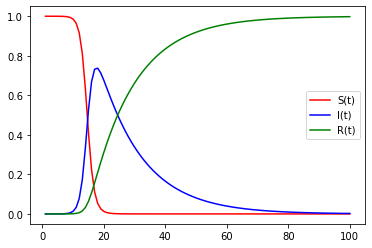

In [26]:
#Plotting the results

plt.plot(t,S,'r',label='S(t)')
plt.plot(t,I,'b',label='I(t)')
plt.plot(t,R,'g',label='R(t)')
plt.legend()
plt.show()